In [29]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [20]:
data=pd.read_csv(r'New_DataV2.csv',header=0)
data

,Unnamed: 0,name,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,0,Old Pulteney 21 Year Old,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,1,Glenkinchie 12 Year Old,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,2,Unnamed: 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,"hat mor""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Lagavulin 16 Year Old,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,Old Forester Bourbon,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,435,Writers Tears Cask Strength 2017 Release,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,436,Hakushu The Hakushu Single Malt Whisky Distill...,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,437,Wyoming Whiskey Barrel Strength,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data=data.drop(['name'], axis=1)
data

,Unnamed: 0,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,0,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,1,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,435,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,436,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,437,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [24]:
data=data.drop(['Unnamed: 0'], axis = 1)
data

,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [25]:
a = data.values
a

array([[ 1,  2,  3, ...,  0,  0,  0],
       [82,  4, 42, ..., 11,  8,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  2,  6, ...,  0,  0,  0],
       [ 5,  1,  1, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  1,  0]], dtype=int64)

<class 'numpy.ndarray'>
labels [ 0 13  8  8  4  8  8  7  1  1 18 14 12  7  8 12 14  7  0 11  8  8  0  8
  0  8  8 12  8  8  8  8  8 12 11  8  8  8  8 12  0  0  7  8 14  8  8  8
  8  8  8  8 14  0  8  0  3  8 11  6  8  8  8  8  8  1  5  8  8 12 11  1
  0  0  0 11  8  8  8  8  8  8  8  8  0  8  8  8  0  8  8  8  8 12  0  8
  8  8  9 11  8  0  8  8  8  8  8  7  8  0  8  8  8  8  8  8 11  8 11  8
  0  8  8  8  8  8  7  7 14  0  8  2  8  3  8  8  0  0  8  8  8 14  8 12
  3  8  8  0  8  0  8  8  8 11  7  2  0  8  0  8  8  8  1  8  8  8  0  8
  8  8  8  8  1  8  8  8 11  8  8  8  0  8  8  8  8  8  8  0  8  8  2  8
  8  8  0  8  8  8  0  8  8  8  8  0  8  8  8  8  8  8  8  8  8  7  0  8
  8  8  8  8  0  8 14 17 14  8  0 12 14  6  1  0  7  7 14  0  0  8  8 19
 18 14 10  7  0 14 14 17 14  8 17 15  8  0  0 10 14 10  8  7  7  6  3 18
  0  7  7  7 15  8  8  0  0 11  0  7 11 11  8  7 11  8  7  8  8 17  3  8
  0  0  8  0  0  8  8  0  8  0  8  8  6 14  8  8  0  7  8  0  8  8  8  8
  3  8  0  8  8 14  

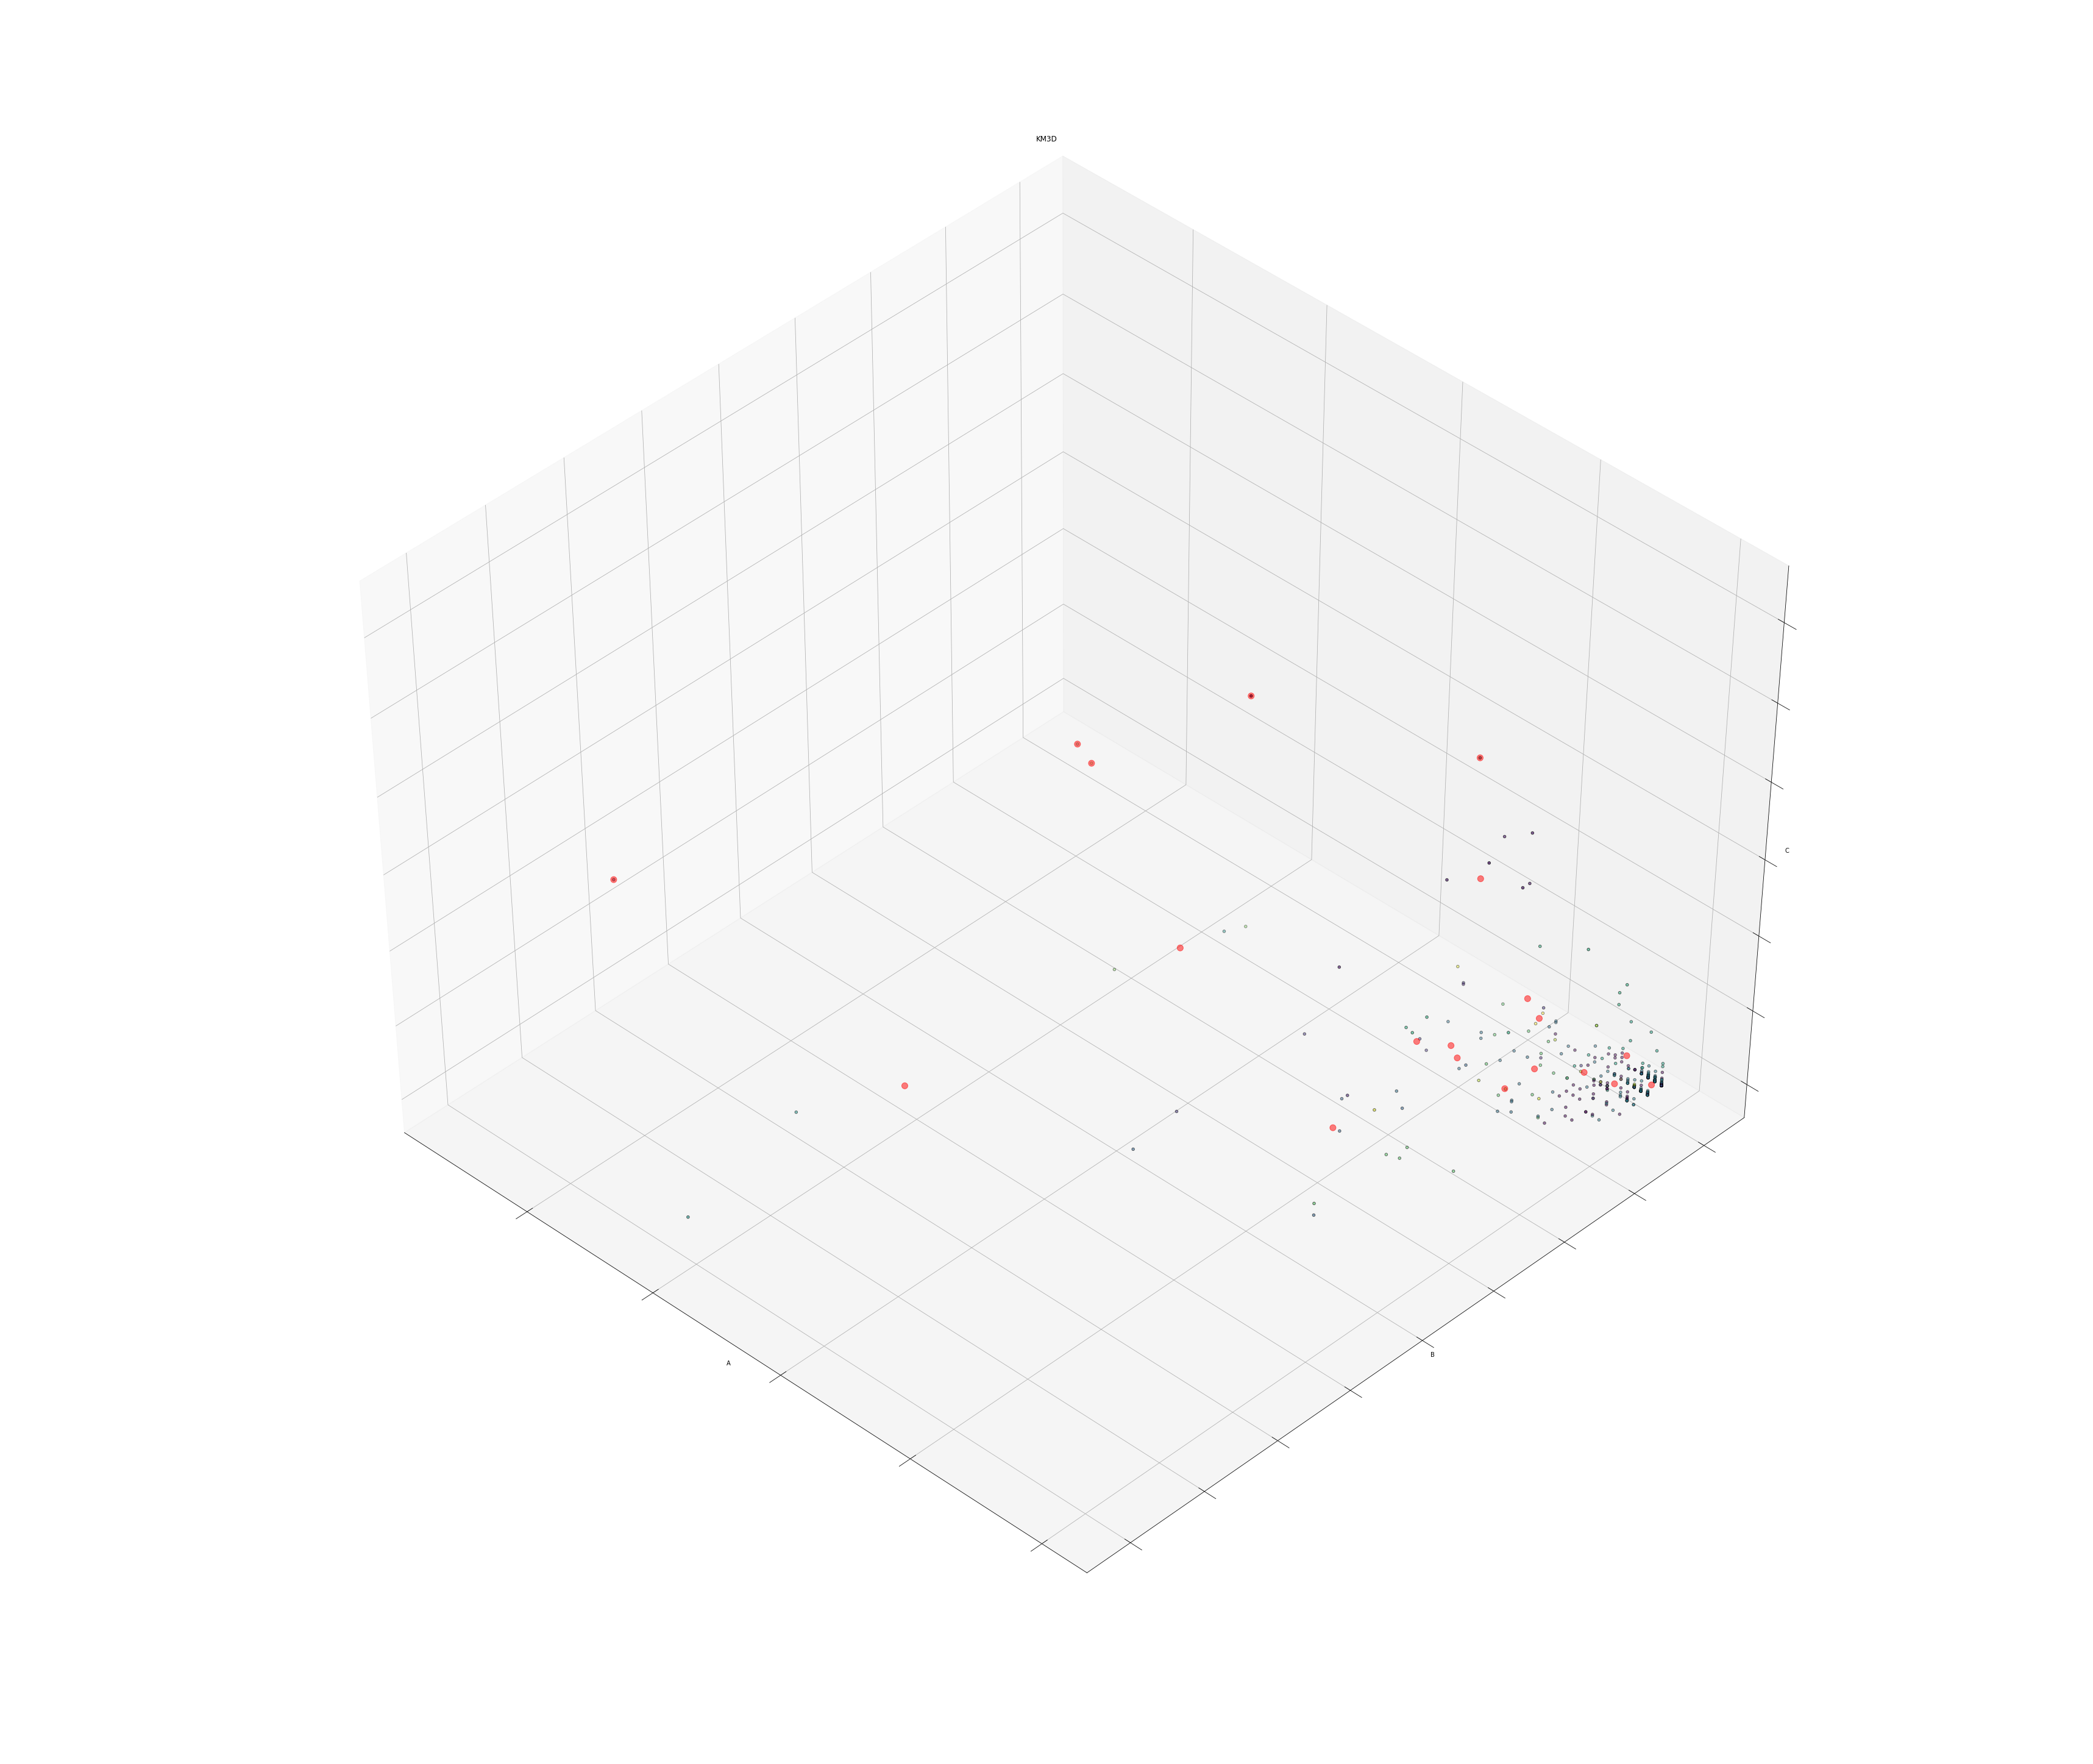

In [31]:
np.random.seed(5)

X = a
model = KMeans(n_clusters=20)
model.fit(X)
labels = model.labels_
print(type(labels))
print("labels", labels, labels.shape)

fig = plt.figure('f0', figsize=(50, 40))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolors='k')

C = model.cluster_centers_
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='red', s=100, alpha=0.5)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('A', fontproperties="SimSum")
ax.set_ylabel('B', fontproperties="SimSum")
ax.set_zlabel('C', fontproperties="SimSum")
ax.set_title("KM3D")
ax.dist = 12
plt.show()